<a href="https://colab.research.google.com/github/mvadrev/Tensorflow/blob/master/MTCNN_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip3 install mtcnn

In [2]:
!pip3 install keras_vggface

In [2]:
import urllib.request
%tensorflow_version 1.x
import tensorflow

def store_image(url, local_file_name):
  with urllib.request.urlopen(url) as resource:
    with open(local_file_name, 'wb') as f:
      f.write(resource.read())

TensorFlow 1.x selected.


In [0]:
store_image('https://ichef.bbci.co.uk/news/320/cpsprodpb/5944/production/_107725822_55fd57ad-c509-4335-a7d2-bcc86e32be72.jpg',
            'iacocca_1.jpg')
store_image('https://www.gannett-cdn.com/presto/2019/07/03/PDTN/205798e7-9555-4245-99e1-fd300c50ce85-AP_080910055617.jpg?width=540&height=&fit=bounds&auto=webp',
            'iacocca_2.jpg')

In [4]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


In [0]:
image = plt.imread('iacocca_1.jpg')

In [6]:
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
    print(face)











{'box': [160, 40, 35, 44], 'confidence': 0.9999798536300659, 'keypoints': {'left_eye': (172, 57), 'right_eye': (188, 57), 'nose': (182, 64), 'mouth_left': (173, 73), 'mouth_right': (187, 73)}}


In [0]:
from matplotlib.patches import Rectangle

In [0]:
def highlight_faces(image_path,faces):
    image = plt.imread(image_path)
    plt.imshow(image)
    
    ax = plt.gca()
    for face in faces:
       x,y,width,height = face['box']
       face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
       ax.add_patch(face_border)
    plt.show()

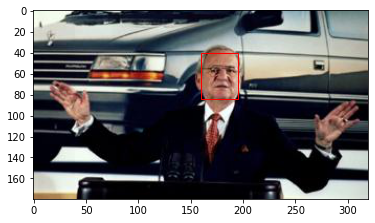

In [24]:
highlight_faces('iacocca_1.jpg',faces)

In [0]:
from numpy import asarray
from PIL import Image

def extract_face_from_image(image_path, required_size=(224, 224)):
  image = plt.imread(image_path)
  detector = MTCNN()
  faces = detector.detect_faces(image)
  face_images = []
  for face in faces:
      x1, y1, width, height = face['box']
      x2, y2 = x1 + width, y1 + height
      face_boundary = image[y1:y2, x1:x2]
      face_image = Image.fromarray(face_boundary)
      face_image = face_image.resize(required_size)
      face_array = asarray(face_image)
      face_images.append(face_array)
  return face_images

extracted_face = extract_face_from_image('iacocca_1.jpg')





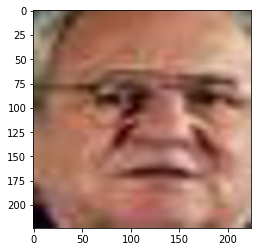

In [26]:
# Display the first face from the extracted faces
plt.imshow(extracted_face[0])
plt.show()

In [0]:
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

In [32]:
def get_model_scores(faces):
  samples = asarray(faces, 'float32')
  samples = preprocess_input(samples, version=2)
  model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')
  return model.predict(samples)

faces = [extract_face_from_image(image_path)
         for image_path in ['iacocca_1.jpg', 'iacocca_2.jpg']]
print("The faces var is",faces)
model_scores = get_model_scores(faces)


The faces var is [[array([[[ 72,  86,  79],
        [ 73,  87,  80],
        [ 75,  88,  81],
        ...,
        [104, 103,  91],
        [103, 102,  90],
        [102, 102,  90]],

       [[ 73,  87,  80],
        [ 74,  88,  81],
        [ 76,  89,  82],
        ...,
        [106, 104,  92],
        [105, 103,  91],
        [104, 103,  91]],

       [[ 75,  89,  82],
        [ 76,  90,  83],
        [ 78,  91,  84],
        ...,
        [109, 107,  95],
        [108, 106,  94],
        [107, 106,  94]],

       ...,

       [[  0,   1,   7],
        [  0,   1,   7],
        [  0,   2,   8],
        ...,
        [ 88,  69,  62],
        [ 84,  65,  58],
        [ 82,  62,  56]],

       [[  0,   1,   7],
        [  0,   1,   7],
        [  0,   2,   8],
        ...,
        [ 82,  63,  57],
        [ 78,  59,  53],
        [ 76,  56,  50]],

       [[  0,   1,   6],
        [  0,   1,   6],
        [  0,   2,   7],
        ...,
        [ 79,  61,  54],
        [ 75,  56,  50],
     

ValueError: ignored